<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-03-30 13:11:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  57.7MB/s    in 3.5s    

2025-03-30 13:11:45 (57.5 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 178.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 125.8 MB/s eta 0:00:00


In [3]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 137.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 144.5 MB/s eta 0:00:00


In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [14]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df_total_count= pd.read_sql_query(QUERY, conn)
print(df_total_count)

   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)

                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


In [11]:
QUERY = """ PRAGMA table_info('main');""" 
pd.read_sql_query(QUERY,conn)

,cid,name,type,notnull,dflt_value,pk
0,0,ResponseId,INTEGER,0,None,0
1,1,MainBranch,TEXT,0,None,0
2,2,Age,TEXT,0,None,0
3,3,Employment,TEXT,0,None,0
4,4,RemoteWork,TEXT,0,None,0
...,...,...,...,...,...,...
109,109,JobSatPoints_11,REAL,0,None,0
110,110,SurveyLength,TEXT,0,None,0
111,111,SurveyEase,TEXT,0,None,0
112,112,ConvertedCompYearly,REAL,0,None,0


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


In [19]:
#create a sqlite query to calculate occurrencies of each CompTotal / distribution
QUERY =""" SELECT CompTotal, COUNT(ResponseId) FROM main GROUP BY CompTotal ORDER BY ResponseId ASC LIMIT 5 """ 
pd.read_sql_query(QUERY,conn)

,CompTotal,COUNT(ResponseId)
0,NaN,31697
1,2040000.0,9
2,28000.0,84
3,85000.0,325
4,50000.0,705


In [20]:
#creer la query non limitee en df
QUERY =""" SELECT CompTotal, COUNT(ResponseId) FROM main GROUP BY CompTotal ORDER BY ResponseId """ 
df_comptotal_hist = pd.read_sql_query(QUERY,conn)

In [25]:
#creer df avec la colonne Comptotal seule pour calculer higher_outlier
Query = """ SELECT Comptotal FROM main """ 
df_comptotal = pd.read_sql_query(Query,conn)

In [26]:
#calcul limite haute outlier
Q3 = df_comptotal['CompTotal'].quantile(0.75) 
Q1 = df_comptotal['CompTotal'].quantile(0.25) 
IQR = Q3-Q1
higher_outlier = Q3 + (1.5*IQR)
higher_outlier

np.float64(535000.0)

In [29]:
import numpy as np

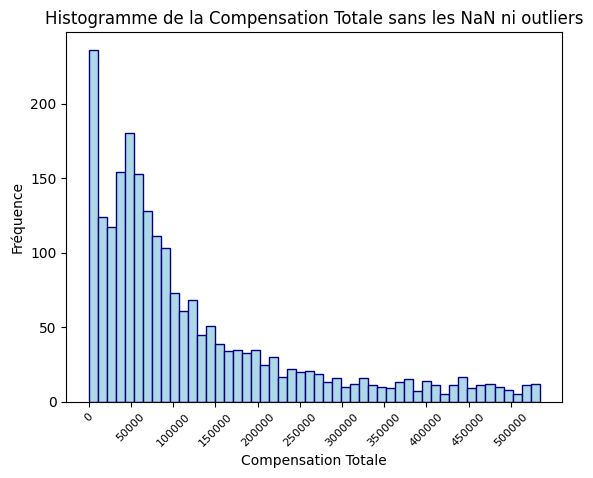

In [31]:
#filtrer la df pour enlever les NaN
df_comptotal_hist_sans_nan = df_comptotal_hist.dropna()
#filtrer les data inferieures a higher_outlier
filtered_data_hist = df_comptotal_hist_sans_nan[df_comptotal_hist_sans_nan['CompTotal'] < higher_outlier]
#histogramme
# Histogramme sans valeurs aberrantes
plt.hist(filtered_data_hist['CompTotal'], bins=50, color= 'lightblue', edgecolor='navy')
plt.title('Histogramme de la Compensation Totale sans les NaN ni outliers')
plt.xlabel('Compensation Totale')
# Définir les graduations régulières sur l'axe x
ticks = np.arange(0, 535001, 50000)  # Par exemple, des pas de 50000
plt.xticks(ticks, fontsize=8, rotation=45)
plt.ylabel('Fréquence')
plt.show()

In [124]:
filtered_data_hist.head()

,CompTotal,COUNT(ResponseId)
2,28000.0,84
3,85000.0,325
4,50000.0,705
5,110000.0,443
6,126420.0,1


**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


In [35]:
#verifier les data de yeras code pro
QUERY=""" SELECT DISTINCT(YearsCodePro) FROM main LIMIT 5""" 
pd.read_sql_query(QUERY, conn)

,YearsCodePro
0,None
1,17
2,27
3,7
4,11


In [64]:
#create a sqlite query to calculate occurrencies of each YearsCodePro / distribution
QUERY =""" SELECT YearsCodePro, COUNT(ResponseId) FROM main GROUP BY YearsCodePro ORDER BY ResponseId ASC LIMIT 5 """ 
pd.read_sql_query(QUERY,conn)

,YearsCodePro,COUNT(ResponseId)
0,None,13827
1,17,814
2,27,380
3,7,2517
4,11,1312


In [131]:
#creer df 
QUERY = """SELECT YearsCodePro, COUNT(ResponseId) FROM main GROUP BY YearsCodePro ORDER BY ResponseId """ 
df_yearscode = pd.read_sql_query(QUERY,conn)

In [132]:
df_yearscode.head()

,YearsCodePro,COUNT(ResponseId)
0,None,13827
1,17,814
2,27,380
3,7,2517
4,11,1312


In [133]:
print(type(df_yearscode))

<class 'pandas.core.frame.DataFrame'>


In [134]:
print(df_yearscode['YearsCodePro'].dtype)

object


In [135]:
df_yearscode.columns

Index(['YearsCodePro', 'COUNT(ResponseId)'], dtype='object')

In [138]:
#remplacer les Less Than 1 years par 1 et les More than 50 years par 51
# Remplacer les valeurs dans la colonne 'YearsCodePro'
df_yearscode['YearsCodePro'] = df_yearscode['YearsCodePro'].replace('Less than 1 year', 1)
df_yearscode['YearsCodePro'] = df_yearscode['YearsCodePro'].replace('More than 50 years', 51)

In [139]:
print(df_yearscode['YearsCodePro'].unique())

[None '17' '27' '7' '11' '25' '12' '10' '3' 1 '18' '37' '15' '20' '6' '2'
 '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9' '33' '13' '35'
 '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39' '44' '42' '41'
 '36' '38' 51 '43' '47' '48' '46' '49']


In [145]:
print(df_yearscode['YearsCodePro'].isnull().sum())  # Nombre de valeurs manquantes
#None n;est pas reconnu comme un NaN

1


In [149]:
df_yearscode.dropna(subset=['YearsCodePro'])
df_yearscode.head()

,YearsCodePro,COUNT(ResponseId)
0,None,13827
1,17,814
2,27,380
3,7,2517
4,11,1312


In [150]:
print(df_yearscode['YearsCodePro'].unique())

[None '17' '27' '7' '11' '25' '12' '10' '3' 1 '18' '37' '15' '20' '6' '2'
 '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9' '33' '13' '35'
 '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39' '44' '42' '41'
 '36' '38' 51 '43' '47' '48' '46' '49']


Les None : ne sont pas reconnus cone NaN, ne peuvent pas etre enleves via dropna() !!

In [154]:
print(type(df_yearscode['YearsCodePro'].iloc[0]))  # Affiche le type de la première valeur

<class 'NoneType'>


In [155]:
# Remplacer NoneType par NaN dans la colonne YearsCodePro
df_yearscode['YearsCodePro'] = df_yearscode['YearsCodePro'].apply(lambda x: np.nan if x is None else x)

In [156]:
print(df_yearscode['YearsCodePro'].unique())

[nan '17' '27' '7' '11' '25' '12' '10' '3' 1 '18' '37' '15' '20' '6' '2'
 '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9' '33' '13' '35'
 '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39' '44' '42' '41'
 '36' '38' 51 '43' '47' '48' '46' '49']


In [157]:
#enlever les NaN
df_yearscode = df_yearscode.dropna(subset=['YearsCodePro'])
print(df_yearscode['YearsCodePro'].unique())

['17' '27' '7' '11' '25' '12' '10' '3' 1 '18' '37' '15' '20' '6' '2' '16'
 '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9' '33' '13' '35' '23'
 '22' '31' '19' '21' '28' '34' '32' '40' '50' '39' '44' '42' '41' '36'
 '38' 51 '43' '47' '48' '46' '49']


In [158]:
#convertir les data en nombre
df_yearscode['YearsCodePro'] = df_yearscode['YearsCodePro'].astype(int)

/tmp/ipykernel_299/1672709369.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yearscode['YearsCodePro'] = df_yearscode['YearsCodePro'].astype(int)


In [160]:
print(df_yearscode['YearsCodePro'].dtype)

int64


In [163]:
df_yearscode.head()

,YearsCodePro,COUNT(ResponseId)
1,17,814
2,27,380
3,7,2517
4,11,1312
5,25,998


Ajuster l'histogramme en ponderant pour le COUNT(ResponseId) car pas pris en compte

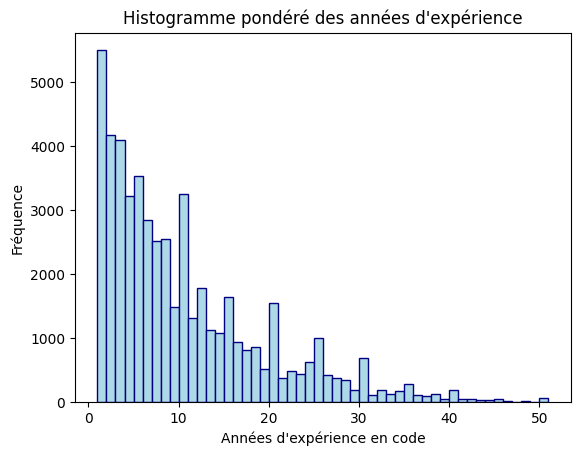

In [167]:
plt.hist(
    df_yearscode['YearsCodePro'], 
    bins=50, 
    weights=df_yearscode['COUNT(ResponseId)'],  # Pondérer par le nombre de répondants
    color='lightblue', 
    edgecolor='navy'
)
plt.title("Histogramme pondéré des années d'expérience")
plt.xlabel("Années d'expérience en code")
plt.ylabel("Fréquence")
plt.show()

Alternative: utiliser un bar chart !

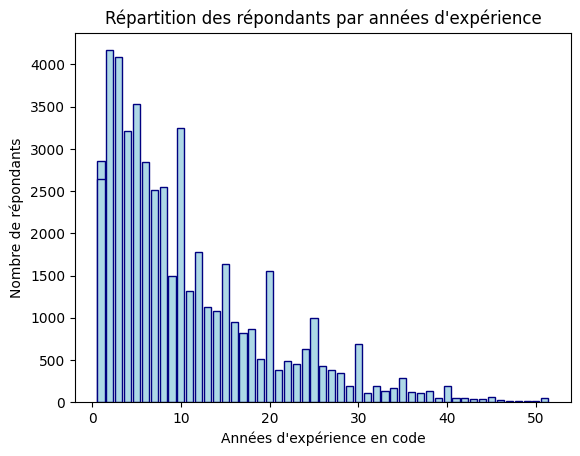

In [164]:
plt.bar(
    df_yearscode['YearsCodePro'],
    df_yearscode['COUNT(ResponseId)'],
    color='lightblue',
    edgecolor='navy'
)
plt.title("Répartition des répondants par années d'expérience")
plt.xlabel("Années d'expérience en code")
plt.ylabel("Nombre de répondants")
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


#creer une query qui selectionne les CompTotal sans outliers ni None, le nombre de ResponseId puis grouper par Age

In [179]:
QUERY = """ SELECT CompTotal FROM main WHERE CompTotal IS NULL LIMIT 2""" 
pd.read_sql_query(QUERY, conn)
#les None sont bien reconnus comme NULL

,CompTotal
0,None
1,None


In [209]:
QUERY = """SELECT Age, CompTotal, COUNT(ResponseId) as Frequency
FROM main
GROUP BY Age, CompTotal""" 
pd.read_sql_query(QUERY,conn)

,Age,CompTotal,Frequency
0,18-24 years old,NaN,9462
1,18-24 years old,0.000000e+00,30
2,18-24 years old,1.000000e+00,2
3,18-24 years old,2.000000e+00,4
4,18-24 years old,3.000000e+00,1
...,...,...,...
5593,Under 18 years old,3.300000e+06,1
5594,Under 18 years old,1.000000e+07,1
5595,Under 18 years old,4.830000e+07,1
5596,Under 18 years old,6.000000e+07,1


In [216]:
QUERY = """SELECT Age, CompTotal, COUNT(ResponseId) as Frequency
FROM main
GROUP BY Age, CompTotal""" 
df_comp_by_age = pd.read_sql_query(QUERY,conn)

In [217]:
#filtrer les outliers mais 5% dessus et dessous car IQR trop restrictive
lower_limit, upper_limit = df_comp_by_age['CompTotal'].quantile([0.05, 0.95])
df_filtered = df_comp_by_age[(df_comp_by_age['CompTotal'] >= lower_limit) & (df_comp_by_age['CompTotal'] <= upper_limit)]


In [218]:
age_categories = df_filtered['Age'].unique()
dfs_by_age = {age: df_filtered[df_filtered['Age'] == age] for age in age_categories}

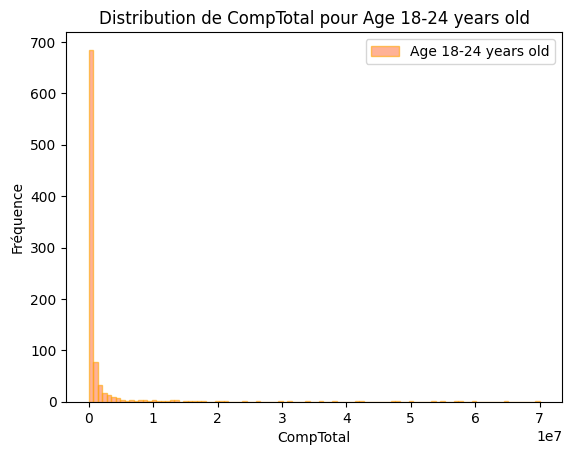

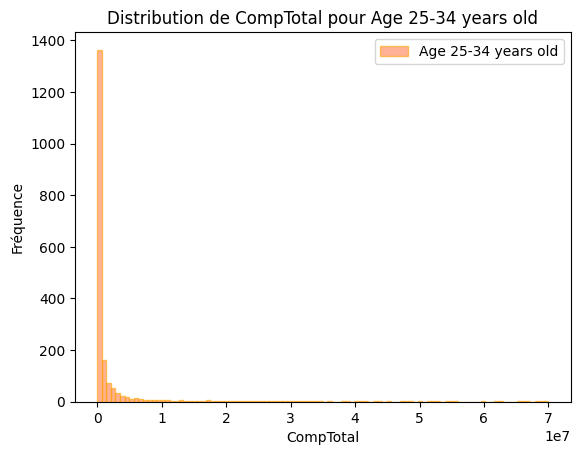

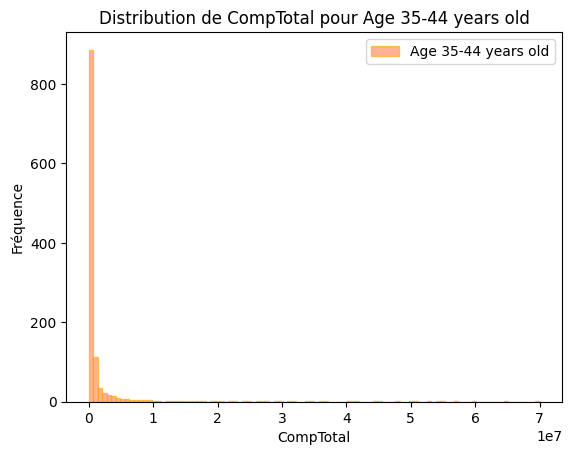

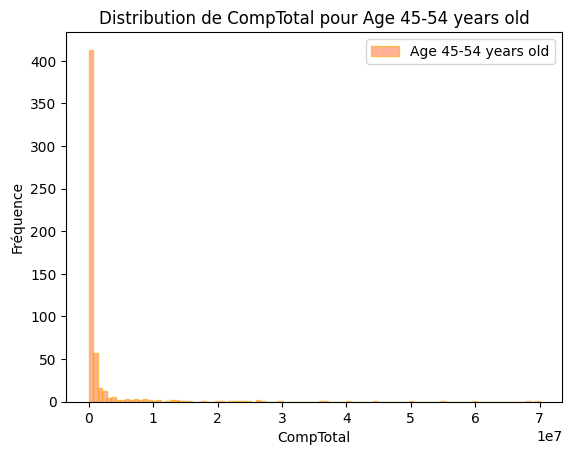

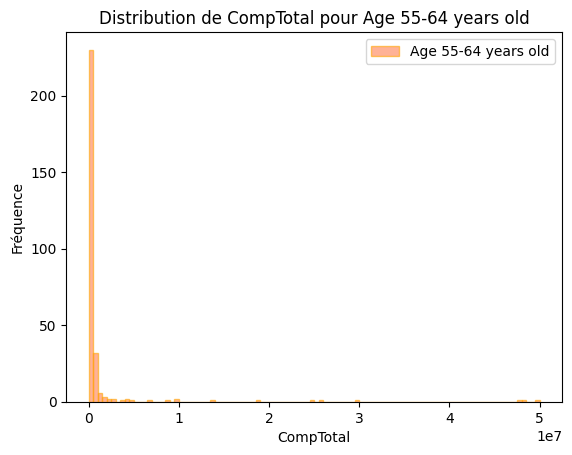

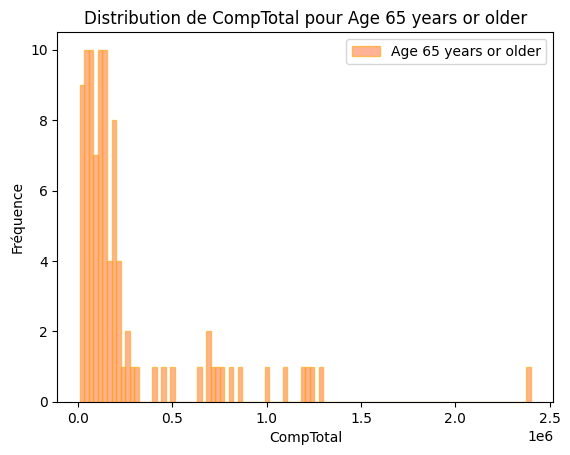

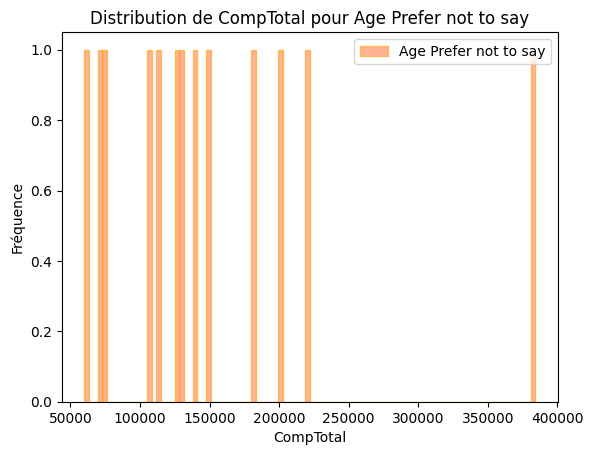

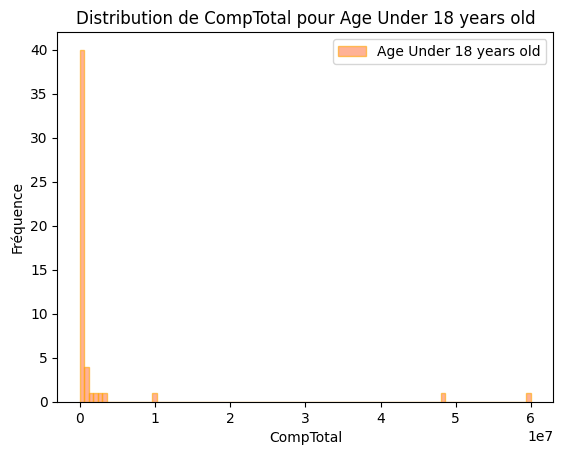

In [224]:
for age, data in dfs_by_age.items():
    plt.hist(data['CompTotal'], bins=100, alpha=0.6, color='Coral', edgecolor='orange', label=f'Age {age}')
    plt.xlabel('CompTotal')
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de CompTotal pour Age {age}')
    plt.legend()
    plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


In [225]:
QUERY = """SELECT Age, TimeSearching, COUNT(ResponseId) as Frequency
FROM main
GROUP BY Age, TimeSearching LIMIT 5""" 
pd.read_sql_query(QUERY,conn)

,Age,TimeSearching,Frequency
0,18-24 years old,None,9923
1,18-24 years old,15-30 minutes a day,922
2,18-24 years old,30-60 minutes a day,1614
3,18-24 years old,60-120 minutes a day,996
4,18-24 years old,Less than 15 minutes a day,223


In [226]:
#creer la df
QUERY = """SELECT Age, TimeSearching, COUNT(ResponseId) as Frequency
FROM main
GROUP BY Age, TimeSearching""" 
df_time = pd.read_sql_query(QUERY,conn)

In [229]:
(df_time['TimeSearching'].isnull().sum())

np.int64(8)

In [233]:
#remplacer NaN par mode
mode_time = df_time['TimeSearching'].mode()[0]
mode_time

'15-30 minutes a day'

In [235]:
df_time['TimeSearching'] = df_time['TimeSearching'].fillna(mode_time)
(df_time['TimeSearching'].isnull().sum())

np.int64(0)

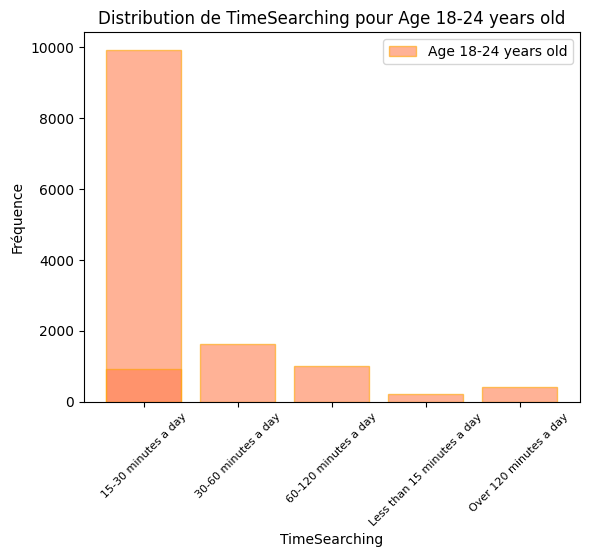

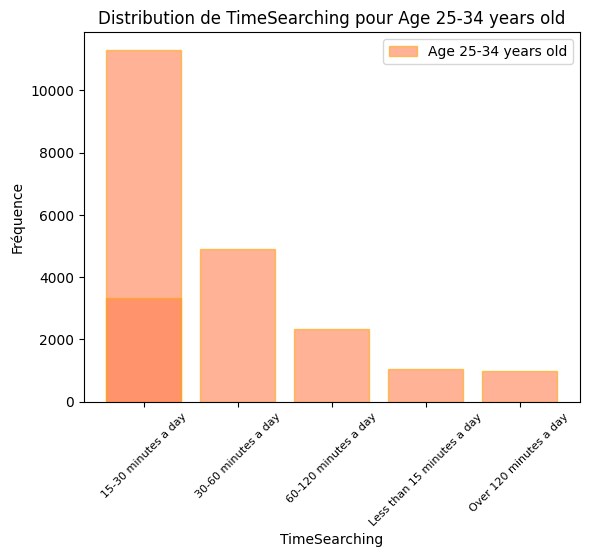

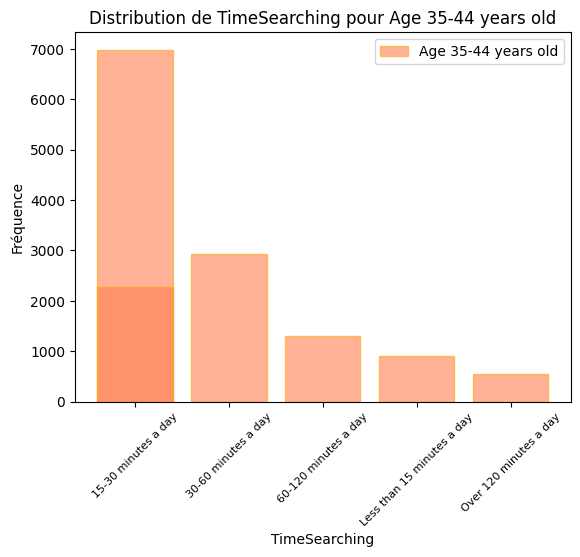

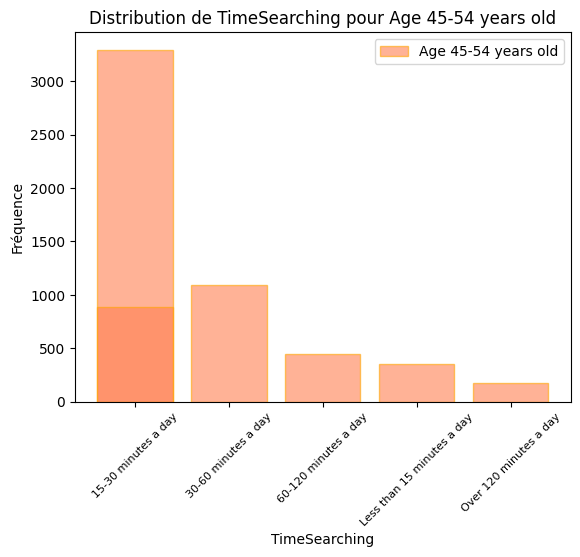

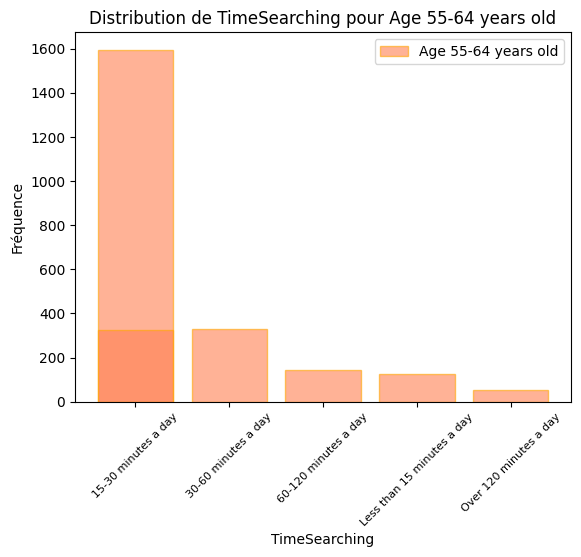

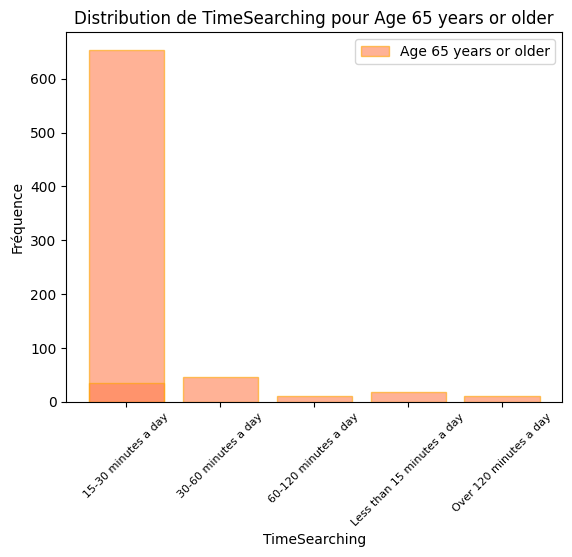

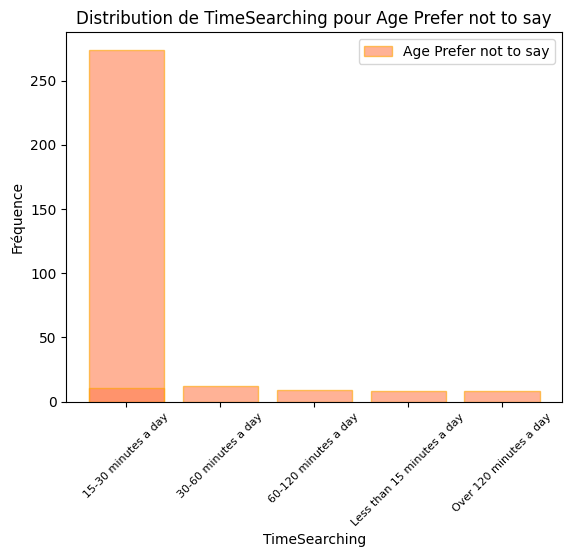

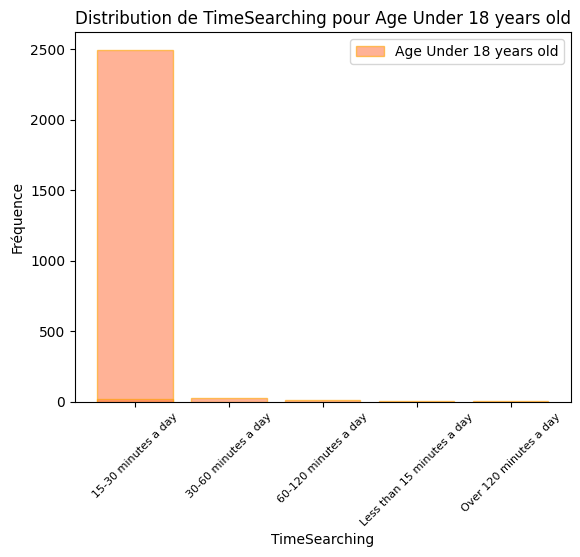

In [241]:
age_categories = df_time['Age'].unique()
dfs_by_age = {age: df_time[df_time['Age'] == age] for age in age_categories}

for age, data in dfs_by_age.items():
    plt.bar(data['TimeSearching'], data['Frequency'], alpha=0.6, color='Coral', edgecolor='orange', label=f'Age {age}')
    plt.xlabel('TimeSearching')
    plt.xticks(fontsize=8, rotation=45)
    plt.ylabel('Fréquence')
    plt.title(f'Distribution de TimeSearching pour Age {age}')
    plt.legend()
    plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


In [15]:
QUERY = """SELECT DatabaseWantToWorkWith, ResponseId FROM main""" 
pd.read_sql_query(QUERY,conn)

,DatabaseWantToWorkWith,ResponseId
0,None,1
1,PostgreSQL,2
2,Firebase Realtime Database,3
3,MongoDB;MySQL;PostgreSQL,4
4,PostgreSQL;SQLite,5
...,...,...
65432,None,65433
65433,None,65434
65434,None,65435
65435,PostgreSQL;SQLite,65436


In [40]:
QUERY = """SELECT DatabaseWantToWorkWith, ResponseId FROM main""" 
df_database = pd.read_sql_query(QUERY,conn)

In [41]:
df_database.head()

,DatabaseWantToWorkWith,ResponseId
0,None,1
1,PostgreSQL,2
2,Firebase Realtime Database,3
3,MongoDB;MySQL;PostgreSQL,4
4,PostgreSQL;SQLite,5


In [42]:
df_database.columns

Index(['DatabaseWantToWorkWith', 'ResponseId'], dtype='object')

In [43]:
print(df_database.isnull().sum())

DatabaseWantToWorkWith    22879
ResponseId                    0
dtype: int64


In [44]:
# Étape 1 : Spliter les choix multiples de DatabaseWantToWorkWith en listes
df_database['DatabaseWantToWorkWith'] = df_database['DatabaseWantToWorkWith'].str.split(';')

# Étape 2 : Exploser la liste pour obtenir une ligne par choix de base de données
df_exploded = df_database.explode('DatabaseWantToWorkWith')

In [46]:
print(df_exploded.isnull().sum())

DatabaseWantToWorkWith    22879
ResponseId                    0
dtype: int64


In [47]:
# Étape 3 : Supprimer le NaN
df_exploded = df_exploded.dropna()

In [48]:
print(df_exploded.isnull().sum())

DatabaseWantToWorkWith    0
ResponseId                0
dtype: int64


In [49]:
# Étape 1 : Compter les occurrences des bases de données value_counts ordonne DESC implicitement
database_counts = df_exploded['DatabaseWantToWorkWith'].value_counts()
# Étape 2 : Créer une DataFrame pour les top 5 bases de données
top_5_databases = database_counts.head(5).reset_index()
top_5_databases.columns = ['Database', 'Frequency']

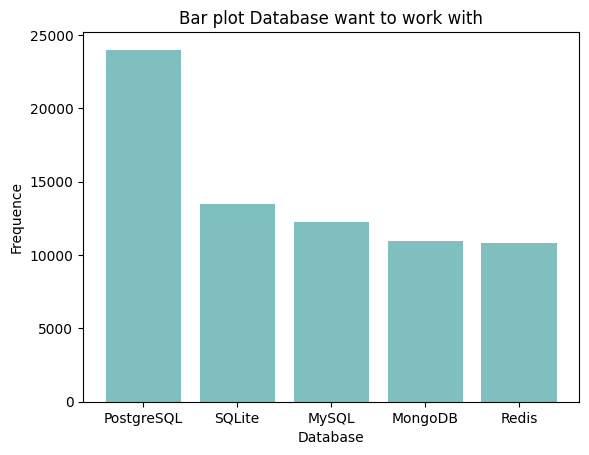

In [51]:
plt.bar(top_5_databases['Database'],top_5_databases['Frequency'], color='teal', alpha=0.5) 
plt.title('Bar plot Database want to work with')
plt.xlabel('Database') 
plt.ylabel('Frequence') 
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


In [55]:
QUERY  = """ SELECT RemoteWork, COUNT(ResponseId) FROM main GROUP BY RemoteWork """ 
pd.read_sql_query(QUERY, conn)

,RemoteWork,COUNT(ResponseId)
0,None,10631
1,"Hybrid (some remote, some in-person)",23015
2,In-person,10960
3,Remote,20831


In [56]:
QUERY  = """ SELECT RemoteWork, COUNT(ResponseId) FROM main GROUP BY RemoteWork """ 
df_remote = pd.read_sql_query(QUERY, conn)

In [59]:
df_remote.isnull().sum()

RemoteWork           1
COUNT(ResponseId)    0
dtype: int64

In [60]:
#enlever les None / NaN
df_remote = df_remote.dropna()
print(df_remote.isnull().sum())

RemoteWork           0
COUNT(ResponseId)    0
dtype: int64


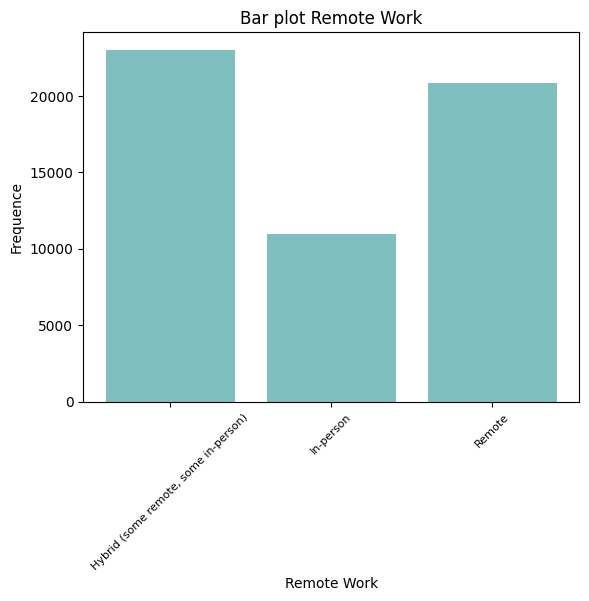

In [64]:
plt.bar(df_remote['RemoteWork'],df_remote['COUNT(ResponseId)'], color='teal', alpha=0.5) 
plt.title('Bar plot Remote Work')
plt.xlabel('Remote Work')
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('Frequence') 
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


In [92]:
#pas de groupe 45 to 60 mais 45-54 et 55-64
QUERY = """ SELECT CompTotal, Age FROM main WHERE Age LIKE '%45-54%' OR AGE LIKE '%55-64%' LIMIT 5""" 
pd.read_sql_query(QUERY,conn)

,CompTotal,Age
0,None,45-54 years old
1,None,45-54 years old
2,None,45-54 years old
3,None,45-54 years old
4,None,45-54 years old


In [93]:
#creer la df
QUERY = """ SELECT CompTotal, Age FROM main WHERE Age LIKE '%45-54%' OR AGE LIKE '%55-64%'""" 
df_midcareer = pd.read_sql_query(QUERY,conn)

In [94]:
(df_midcareer.isnull().sum())

CompTotal    4029
Age             0
dtype: int64

In [95]:
df_midcareer['Age'].unique()

array(['45-54 years old', '55-64 years old'], dtype=object)

In [96]:
df_midcareer = df_midcareer.dropna()
(df_midcareer.isnull().sum())

CompTotal    0
Age          0
dtype: int64

In [97]:
df_grouped = df_midcareer.groupby('Age')['CompTotal'].mean().reset_index()

In [98]:
df_grouped.head()

,Age,CompTotal
0,45-54 years old,5.076824e+06
1,55-64 years old,7.818608e+49


In [100]:
import numpy as np
# Appliquer la transformation lo car la difference est trop grande
df_grouped['LogCompTotal'] = np.log(df_grouped['CompTotal'])

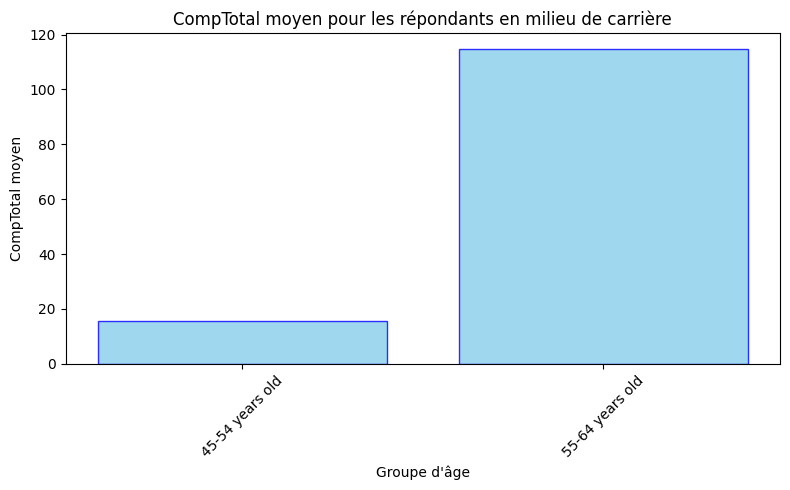

In [101]:
#Création du bar plot
plt.figure(figsize=(8, 5))
plt.bar(df_grouped['Age'], df_grouped['LogCompTotal'], color='skyblue', edgecolor='blue', alpha=0.8)
plt.xlabel("Groupe d'âge")
plt.ylabel("CompTotal moyen")
plt.title("CompTotal moyen pour les répondants en milieu de carrière")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


On ne peut pas representer 3 variables sur un histogramme, ca ne fait pas de sens

In [145]:
QUERY = """SELECT YearsCodePro, JobSat, COUNT(*) as Frequency
FROM main
WHERE JobSat IS NOT NULL
GROUP BY YearsCodePro, JobSat
ORDER BY YearsCodePro, Frequency DESC LIMIT 5""" 
pd.read_sql_query(QUERY,conn)

,YearsCodePro,JobSat,Frequency
0,None,8.0,184
1,None,7.0,136
2,None,6.0,100
3,None,5.0,87
4,None,9.0,69


In [147]:
QUERY = """SELECT YearsCodePro, JobSat, COUNT(*) as Frequency
FROM main
WHERE JobSat IS NOT NULL
GROUP BY YearsCodePro, JobSat
ORDER BY YearsCodePro, Frequency DESC """ 
df_jobsat = pd.read_sql_query(QUERY,conn)

In [148]:
(df_jobsat.isnull().sum())

YearsCodePro    11
JobSat           0
Frequency        0
dtype: int64

In [155]:
df_jobsat['JobSat'].unique()

array([ 8.,  7.,  6.,  9., 10.,  5.,  3.,  4.,  2.,  0.,  1.])

In [149]:
df_jobsat = df_jobsat.dropna() 
(df_jobsat.isnull().sum())

YearsCodePro    0
JobSat          0
Frequency       0
dtype: int64

In [150]:
df_jobsat['YearsCodePro'].unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '6', '7', '8', '9', 'Less than 1 year',
       'More than 50 years'], dtype=object)

In [151]:
#remplacer les Less Than 1 years par 1 et les More than 50 years par 51
# Remplacer les valeurs dans la colonne 'YearsCodePro'
df_jobsat['YearsCodePro'] = df_jobsat['YearsCodePro'].replace('Less than 1 year', 1)
df_jobsat['YearsCodePro'] = df_jobsat['YearsCodePro'].replace('More than 50 years', 51)

In [152]:
df_jobsat['YearsCodePro'].unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39',
       '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49',
       '5', '50', '6', '7', '8', '9', 1, 51], dtype=object)

In [153]:
df_jobsat['YearsCodePro']=df_jobsat['YearsCodePro'].astype(int)
df_jobsat['YearsCodePro'].dtype

dtype('int64')

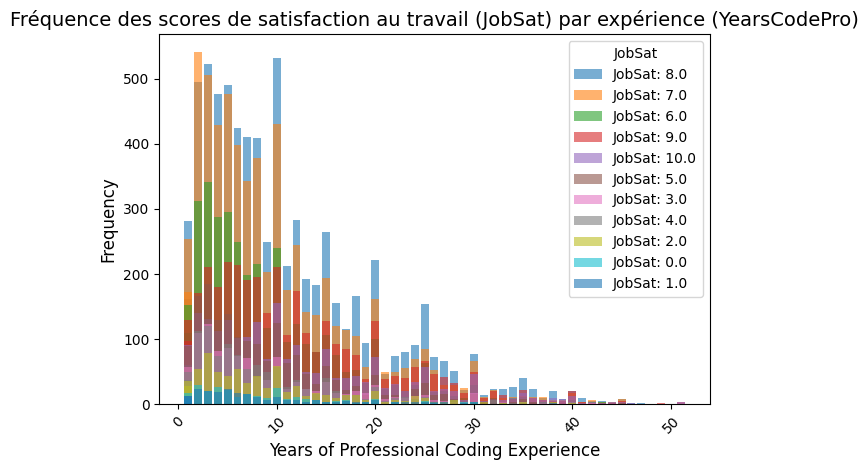

In [158]:
# Liste des scores uniques de JobSat pour créer les séries dans le graphe
job_sat_scores = df_jobsat['JobSat'].unique()

# Ajouter une série pour chaque JobSat score
for score in job_sat_scores:
    data = df_jobsat[df_jobsat['JobSat'] == score]
    plt.bar(data['YearsCodePro'], data['Frequency'], alpha=0.6, label=f'JobSat: {score}')

plt.xlabel('Years of Professional Coding Experience', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Fréquence des scores de satisfaction au travail (JobSat) par expérience (YearsCodePro)', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='JobSat', fontsize=10)
plt.tight_layout()
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [159]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
